# Fourier Transform

References:
* [3Blue1Brown](https://www.youtube.com/embed/spUNpyF58BY)
* [Python Numerical Methods](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.00-Fourier-Transforms.html)
* [The Fast Fourier Transform](https://www.youtube.com/watch?v=h7apO7q16V0&ab_channel=Reducible)
* [Understanding the FFT algorithm](https://jakevdp.github.io/blog/2013/08/28/understanding-the-fft/)
* [Original Cooley-Tukey FFT paper](https://www.ams.org/journals/mcom/1965-19-090/S0025-5718-1965-0178586-1/S0025-5718-1965-0178586-1.pdf)
* [FFTPACK implementation](http://www.netlib.org/fftpack/fft.c)


In [1]:
from IPython.display import IFrame
#HTML('<iframe width="950" height="520" src="https://www.youtube.com/embed/spUNpyF58BY" frameborder="1" allowfullscreen></iframe>')
IFrame(src="https://www.youtube.com/embed/spUNpyF58BY", width=950, height=520)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

In [3]:
dx = 0.01
x = np.arange(0,2. + dx,dx)

In [4]:
y = np.exp(-1j * 2*np.pi*3*x)
cw = np.cos(2*np.pi*3*x)
f = cw*y

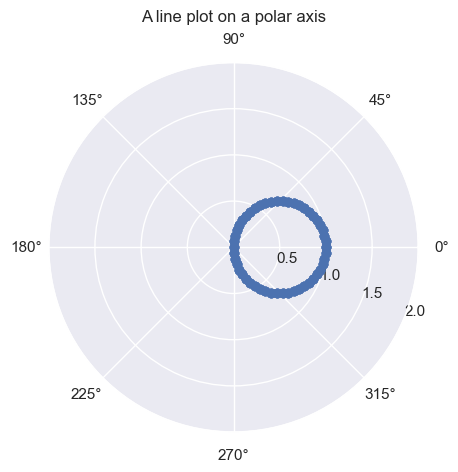

In [5]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.scatter(np.angle(f), np.abs(f))
ax.set_rmax(2)
ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()

In [6]:
np.exp(-1j * 2*np.pi*10*x)
cw = np.cos(2*np.pi*1*x)
f = cw*y

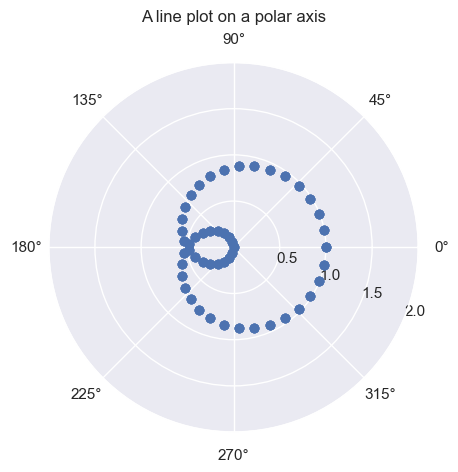

In [7]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.scatter(np.angle(f), np.abs(f))
ax.set_rmax(2)
ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()

In [8]:
n = np.arange(N)
n.reshape((1,N))
k = n.reshape((N, 1))
print(n.shape)
print(k.shape)

NameError: name 'N' is not defined

In [ ]:
n.dot(k).shape

In [ ]:
(n*k).shape # tensor product

# DFT

## Scratch

In [ ]:
xt = 1000
xmin = 0.
xmax = 2.
x = np.linspace(xmin,xmax,xt)
minfreq = 2
maxfreq = 20
fun = np.cos(2*np.pi*3*x) + 2*np.cos(2*np.pi*5*x)
numfreq = 10*(maxfreq - minfreq)

In [ ]:
import numba
#using num frequencies different from num time samples
@numba.jit(nopython=True)
def ft(f: np.ndarray) -> np.ndarray:
    ff = np.zeros(shape=numfreq, dtype=np.csingle)
    n = np.linspace(minfreq, maxfreq, numfreq)
    N = len(f)
    k = np.arange(N) * (xmax - xmin) #same range as function
    for i in range(len(n)):
        ff[i] = np.sum(f*np.exp(-1j * 2 * np.pi * n[i] * k / N))
    return ff

In [ ]:
y = np.abs(ft(fun))
m = np.max(y)
cutoff = 0.05 * m
p = np.vectorize(lambda x: x if x >= cutoff else 0)(y)
plt.xticks(np.arange(minfreq, maxfreq, 1.0))
plt.bar(np.linspace(minfreq,maxfreq,numfreq), p, align="center", width=0.1)
#plt.plot(np.linspace(minfreq,maxfreq,numfreq), p)
plt.show()

## DFT

\begin{equation}
    X_k = \sum_{n=0}^{N-1} f_n e^{-i 2\pi kn/N } = \sum_{n=0}^{N-1} f_n[cos(2\pi kn/N) - i * sin(2\pi kn/N)], \quad k = 0, \ldots, N-1.
\end{equation}

In [ ]:
# sampling rate
sr = 100
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()

In [ ]:
def DFT(x: np.ndarray) -> np.ndarray:
    """
    Function to calculate the 
    discrete Fourier Transform 
    of a 1D real-valued signal x
    """

    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N) # tensor product of all k x all n
    
    X = np.dot(e, x)
    
    return X

In [ ]:
X = DFT(x)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (8, 6))
plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.show()


In [ ]:
X = DFT(x)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (8, 6))
plt.stem(freq, np.angle(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Phase X(freq)')
plt.show()


In [ ]:
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')

plt.subplot(122)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.xlim(0, 10)
plt.tight_layout()
plt.show()


## Inverse DFT

\begin{equation}
    X_k =  \frac{1}{N} \sum_{n=0}^{N-1} f_n e^{i 2\pi kn/N } = \frac{1}{N} \sum_{n=0}^{N-1} f_n[cos(2\pi kn/N) + i * sin(2\pi kn/N)], \quad k = 0, \ldots, N-1.
\end{equation}

In [ ]:
def IDFT(x: np.ndarray) -> np.ndarray:
    """
    Function to calculate the 
    discrete Fourier Transform 
    of a 1D real-valued signal x
    """

    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(2j * np.pi * k * n / N) / N # tensor product of all k x all n
    
    X = np.dot(e, x)
    
    return X

In [ ]:
X = IDFT(DFT(x))

In [ ]:
(np.abs(X-x)**2).mean()

In [ ]:
X = IDFT(DFT(x))

plt.figure(figsize = (8, 6))
plt.plot(t, np.real(X), 'r')
plt.ylabel('Amplitude')

plt.show()

# FFT

In [ ]:
sr = 4
t = np.arange(0,1,ts)
N = sr
f = 2*np.cos(2*np.pi*t) + 3*np.cos(2*np.pi*4*t) + 7*np.cos(2*np.pi*9*t)

In [ ]:
n = np.arange(N)
k = n.reshape((N, 1))
e = np.exp(-2j * np.pi * k * n / N) # tensor product of all k x all n

In [ ]:
e

In [ ]:
def FFT(x):
    """A recursive implementation of the 1D Cooley-Tukey FFT"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    
    if N % 2 > 0:
        raise ValueError("size of x must be a power of 2")
    elif N <= 8:  # this cutoff should be optimized
        return DFT(x)
    else:
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])
        factor = np.exp(-2j * np.pi * np.arange(N) / N)
        return np.concatenate([X_even + factor[:N // 2] * X_odd,
                               X_even + factor[N // 2:] * X_odd])

In [ ]:
x = np.random.random(1024)
np.allclose(FFT(x), np.fft.fft(x))

In [ ]:
%timeit DFT(x)
%timeit FFT(x)
%timeit np.fft.fft(x)

In [ ]:
def FFT_vectorized(x: np.ndarray) -> np.ndarray:
    """A vectorized, non-recursive version of the Cooley-Tukey FFT"""
    x = np.asarray(x, dtype=np.float64)
    N = x.shape[0]

    if np.log2(N) % 1 > 0:
        raise ValueError("size of x must be a power of 2")

    # N_min here is equivalent to the stopping condition above,
    # and should be a power of 2
    N_min = min(N, 4)
    
    # Perform an O[N^2] DFT on all length-N_min sub-problems at once
    n = np.arange(N_min)
    k = n[:, None]
    M = np.exp(-2j * np.pi * n * k / N_min)
    X = np.dot(M, x.reshape((N_min, -1)))
    # build-up each level of the recursive calculation all at once
    while X.shape[0] < N:
        X_even = X[:, :X.shape[1] // 2]
        X_odd = X[:, X.shape[1] // 2:]
        factor = np.exp(-1j * np.pi * np.arange(X.shape[0])
                        / X.shape[0])[:, None]
        X = np.vstack([X_even + factor * X_odd,
                       X_even - factor * X_odd])
    return X.ravel()

In [ ]:
x = np.random.random(8192)
np.allclose(FFT_vectorized(x), np.fft.fft(x))

In [ ]:
%timeit FFT(x)
%timeit FFT_vectorized(x)
%timeit ft(x)
%timeit np.fft.fft(x)

In [ ]:
@numba.jit(nopython=True)
def bitReverse(x: int, log2n: int) -> int:
    n = 0
    for i in range(log2n):
        n <<= 1
        n |= (x & 1)
        x >>= 1
    return n
 
# Iterative FFT function to compute the DFT
# of the given coefficient vector
 
@numba.jit(nopython=True)
def FFT_iterative(a: np.ndarray) -> np.ndarray:
    n = len(a)
    A = np.zeros(n, dtype=np.complex64)
    log2n = int(np.log2(n))
    # bit reversal of the given array
    for i in range(n):
        rev = bitReverse(i, log2n)
        A[i] = a[rev]

    for s in range(1, log2n + 1):
        m = 1 << s  # 2 power s
        m2 = m >> 1  # m2 = m/2 -1
        w = 1.0 + 0j
 
        # principle root of nth complex
        # root of unity.
        wm = np.exp(-1j * np.pi / m2)
        for j in range(m2):
            for k in range(j, n, m):
 
                # t = twiddle factor
                t = w * A[k + m2]
                u = A[k]
 
                # similar calculating y[k]
                A[k] = u + t
 
                # similar calculating y[k+n/2]
                A[k + m2] = u - t
            w *= wm
    return A

In [ ]:
x = np.random.random(8192)
np.allclose(FFT_iterative(x), np.fft.fft(x))

In [ ]:
%timeit FFT_iterative(x)
%timeit np.fft.fft(x)

In [9]:
import codon

In [10]:
@codon.jit
def fib(n):
    return 1 if n < 2 else fib(n-1) + fib(n-2)

In [11]:
fib(4)

5

In [13]:
from python import numpy as np
@codon.jit
def bitReverse2(x: int, log2n: int) -> int:
    n = 0
    for i in range(log2n):
        n <<= 1
        n |= (x & 1)
        x >>= 1
    return n
 
# Iterative FFT function to compute the DFT
# of the given coefficient vector
 
@codon.jit
def FFT_iterative2(a: np.ndarray) -> np.ndarray:
    n = len(a)
    A = np.zeros(n, dtype=np.complex64)
    log2n = int(np.log2(n))
    # bit reversal of the given array
    for i in range(n):
        rev = bitReverse2(i, log2n)
        A[i] = a[rev]

    for s in range(1, log2n + 1):
        m = 1 << s  # 2 power s
        m2 = m >> 1  # m2 = m/2 -1
        w = 1.0 + 0j
 
        # principle root of nth complex
        # root of unity.
        wm = np.exp(-1j * np.pi / m2)
        for j in range(m2):
            for k in range(j, n, m):
 
                # t = twiddle factor
                t = w * A[k + m2]
                u = A[k]
 
                # similar calculating y[k]
                A[k] = u + t
 
                # similar calculating y[k+n/2]
                A[k + m2] = u - t
            w *= wm
    return A

ModuleNotFoundError: No module named 'python'